In [1]:
import pandas as pd
import numpy as np
from strength_covariance.model_selection import basic_outlier_removal, filter_param_list, data_import
from strength_covariance.dft_import import create_pipe, se_unit_convert, create_X_y, get_boxplot, get_df_dft
from strength_covariance.explore import import_label_dict
import statsmodels.api as sm

In [2]:
def dft_analysis(model_properties = ['unstable_stack_energy_fcc', 
                                     'intr_stack_fault_energy_fcc', 
                                     'c44_fcc']): 
    df, readme = data_import(data_path="../data/models_w_props.csv",
                            clean=True)
    label_dict = import_label_dict(path = "../strength_covariance/data_ays/label_dict.csv")
    print(f"number of points initially: {len(df)}")

    # remove jammed
    df = df[df["SF_jamming"]!="yes"]
    print(f"number of points after removing jammed: {len(df)}")


    X_df, y = create_X_y(df, model_properties)
    readme += f"{len(X_df.columns)} factors: {X_df.columns}\n"

    pipe = create_pipe()
    X = X_df[model_properties]
    pipe.fit(X)
    X_scaled = pipe.transform(X)
    X_scaled = sm.add_constant(X_scaled, prepend=False)
    res = sm.OLS(y,X_scaled).fit()
    print(res.summary())
    y_pred = res.predict(X_scaled)
    #r2_adj = r2_score(y,y_pred)

    df_dft = get_df_dft(path = "../data/dft.csv") #also converts SEs and SFE units
    X_dft_scaled = pipe.transform(df_dft[X_df.columns])
    X_dft_scaled = sm.add_constant(X_dft_scaled, prepend=False)
    y_pred_dft = res.predict(X_dft_scaled)

    predictions = res.get_prediction(X_dft_scaled)
    df_pi = predictions.summary_frame(alpha=0.05)
    df_pi['species'] = df_dft['species'].tolist()
    print(df_pi)
    get_boxplot(df, df_pi, save_fig = False)

number of points initially: 163
number of points after removing jammed: 153
                            OLS Regression Results                            
Dep. Variable:           strength_MPa   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     255.5
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           1.63e-58
Time:                        07:48:20   Log-Likelihood:                -1051.1
No. Observations:                 153   AIC:                             2110.
Df Residuals:                     149   BIC:                             2122.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

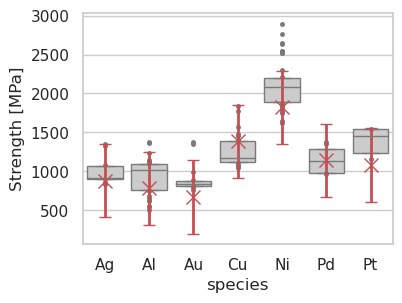

In [3]:
dft_analysis(['unstable_stack_energy_fcc', 
              'intr_stack_fault_energy_fcc', 
              'c44_fcc'])

number of points initially: 163
number of points after removing jammed: 153
                            OLS Regression Results                            
Dep. Variable:           strength_MPa   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     364.9
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           2.04e-68
Time:                        07:48:20   Log-Likelihood:                -1027.6
No. Observations:                 153   AIC:                             2063.
Df Residuals:                     149   BIC:                             2075.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

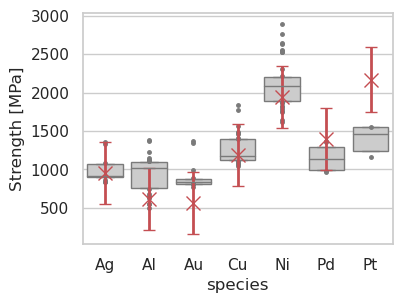

In [4]:
dft_analysis(['vacancy_migration_energy_fcc', 
              'intr_stack_fault_energy_fcc', 
              'c44_fcc'])

number of points initially: 163
number of points after removing jammed: 153
                            OLS Regression Results                            
Dep. Variable:           strength_MPa   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     371.8
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           6.02e-69
Time:                        07:48:21   Log-Likelihood:                -1026.4
No. Observations:                 153   AIC:                             2061.
Df Residuals:                     149   BIC:                             2073.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

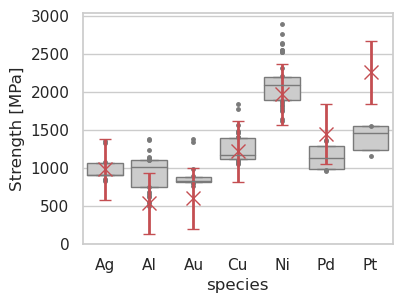

In [5]:
dft_analysis(['vacancy_migration_energy_fcc', 
              'surface_energy_100_fcc', 
              'lattice_constant_fcc'])

number of points initially: 163
number of points after removing jammed: 153
                            OLS Regression Results                            
Dep. Variable:           strength_MPa   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     397.4
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           7.43e-71
Time:                        07:48:21   Log-Likelihood:                -1021.9
No. Observations:                 153   AIC:                             2052.
Df Residuals:                     149   BIC:                             2064.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

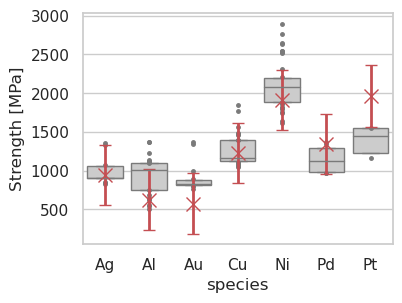

In [6]:
dft_analysis(['vacancy_migration_energy_fcc', 
              'unstable_stack_energy_fcc', 
              'c44_fcc'])